In [1]:
import sys
from pathlib import Path

# Add project root to sys.path
project_root = Path().resolve().parent  # Adjust if notebook is inside notebooks/
sys.path.append(str(project_root))


In [2]:
# Import modules
from src.data_loader import load_csv
from src.preprocessing import drop_columns, remove_outliers, add_time_features
from src.visualization import (
    lineplot_timeseries, barplot_by_time, correlation_heatmap,
    scatter_plots, wind_rose, bubble_chart
)
from src.analysis import cleaning_impact


In [3]:
# Load data
df = load_csv("../data/raw/sierraleone-bumbuna.csv", parse_dates=["Timestamp"])


In [4]:
# Clean data
df = drop_columns(df, ["Comments"])
numeric_cols = ["GHI", "DNI", "DHI", "ModA", "ModB", "WS", "WSgust"]
df_clean = remove_outliers(df, numeric_cols)

In [5]:
# Add features
df_clean = add_time_features(df_clean)

In [6]:
# Quick stats
df_clean.describe()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Hour,Year
count,509308,509308.000000,509308.000000,509308.000000,509308.000000,509308.000000,509308.000000,509308.000000,509308.000000,509308.000000,509308.000000,509308.000000,509308.000000,509308.000000,509308.000000,509308.000000,509308.000000,509308.000000,509308.000000,509308.000000
mean,2022-04-29 18:45:56.196957440,185.000024,104.128943,108.104278,189.764194,181.693908,26.214248,79.747674,1.089871,1.614397,0.352298,130.947234,6.962560,999.873395,0.000997,0.004159,31.959657,32.087075,11.449551,2021.829072
min,2021-10-30 00:01:00,-15.900000,-7.800000,-16.700000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000,0.000000,2021.000000
25%,2022-01-29 08:28:45,-3.300000,-0.300000,-4.100000,0.000000,0.000000,23.100000,69.000000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.400000,23.700000,5.000000,2022.000000
50%,2022-04-28 22:48:30,-0.400000,-0.100000,-0.600000,1.200000,1.100000,25.100000,86.100000,0.800000,1.400000,0.400000,156.200000,5.800000,1000.000000,0.000000,0.000000,26.300000,26.500000,11.000000,2022.000000
75%,2022-07-29 01:19:15,331.300000,74.800000,217.900000,327.200000,314.500000,29.200000,97.000000,1.900000,2.600000,0.500000,232.800000,11.800000,1001.000000,0.000000,0.000000,39.600000,40.000000,18.000000,2022.000000
max,2022-10-30 00:00:00,1097.000000,772.300000,590.500000,1105.000000,1064.000000,39.900000,100.000000,4.800000,6.400000,2.500000,360.000000,98.400000,1006.000000,1.000000,2.000000,71.200000,70.000000,23.000000,2022.000000
std,NaN,279.019460,200.954182,153.691835,281.888942,269.988109,4.397260,20.556188,1.155220,1.503353,0.283730,114.365092,7.455692,2.106966,0.031566,0.040205,12.029241,11.666626,7.001475,0.376446


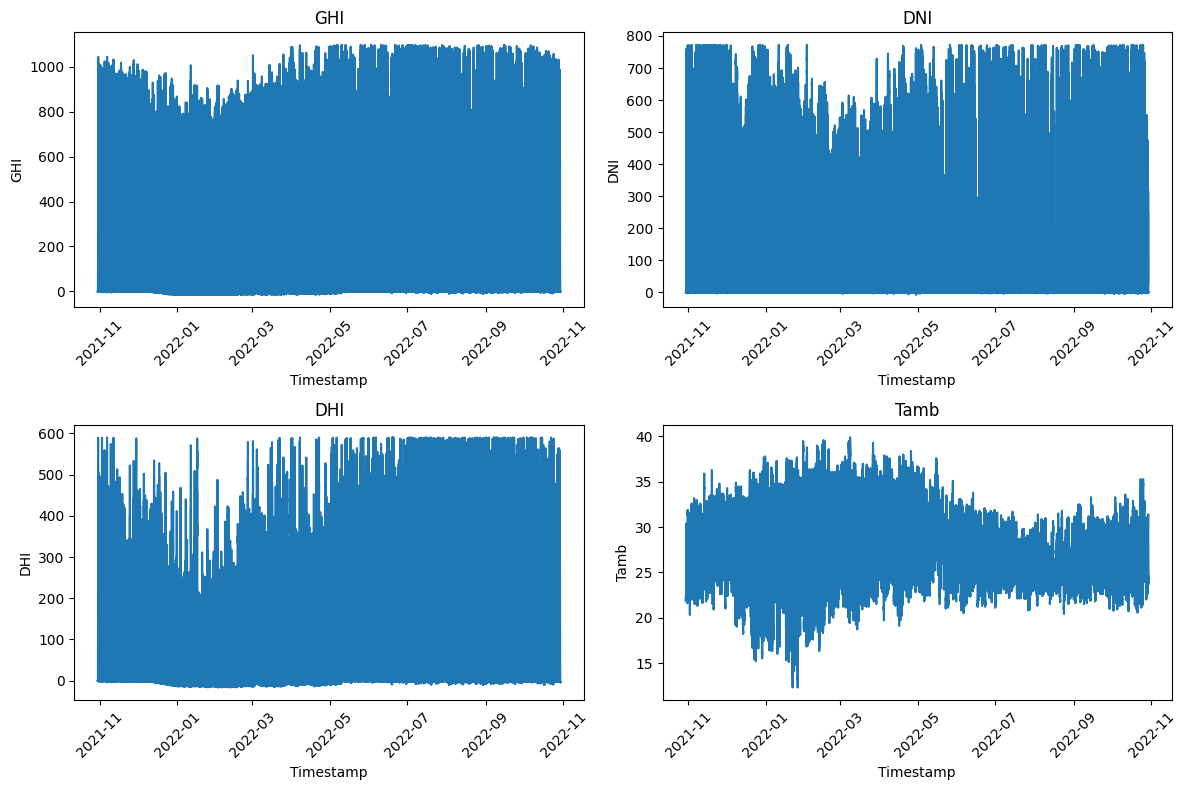

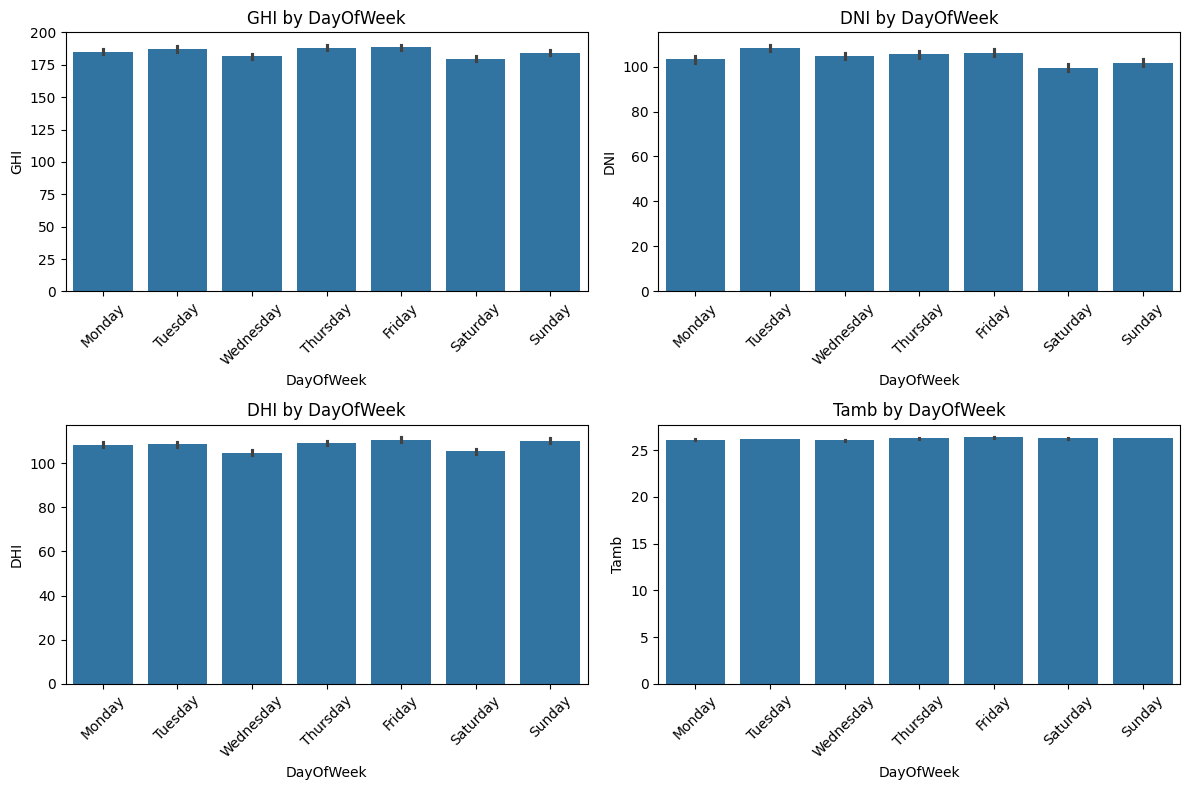

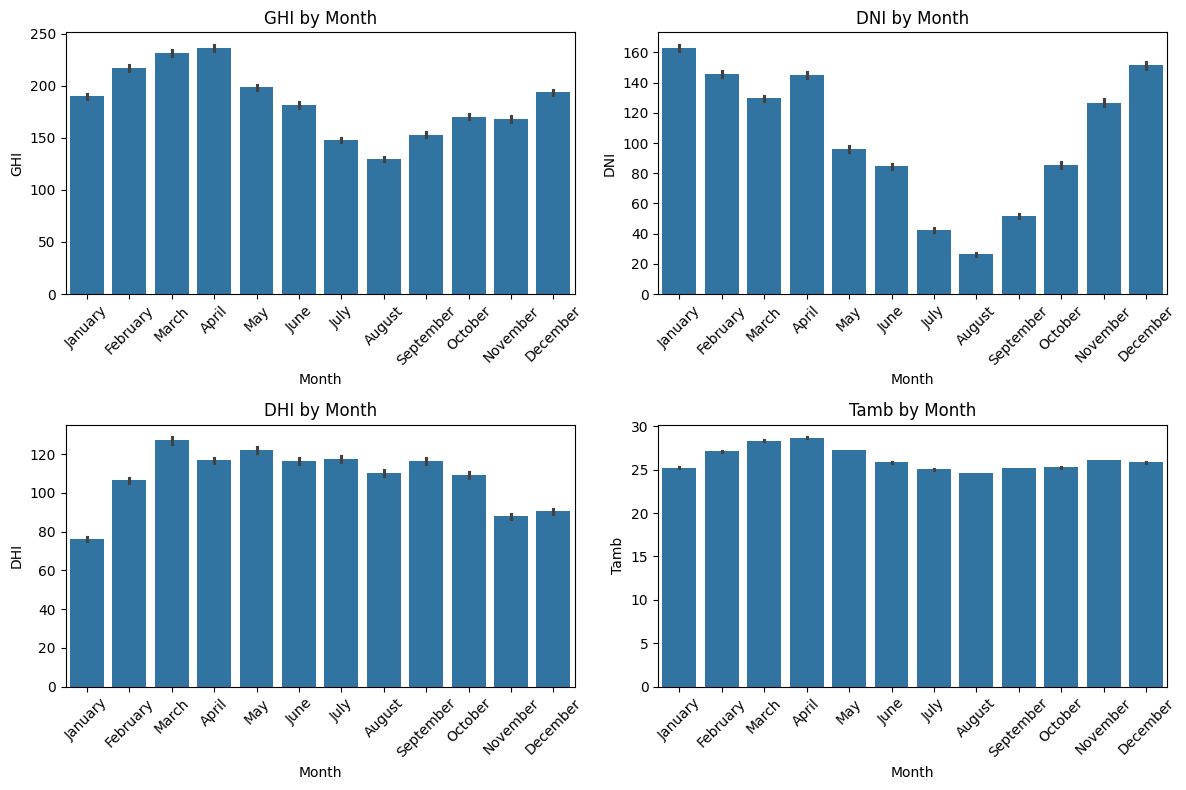

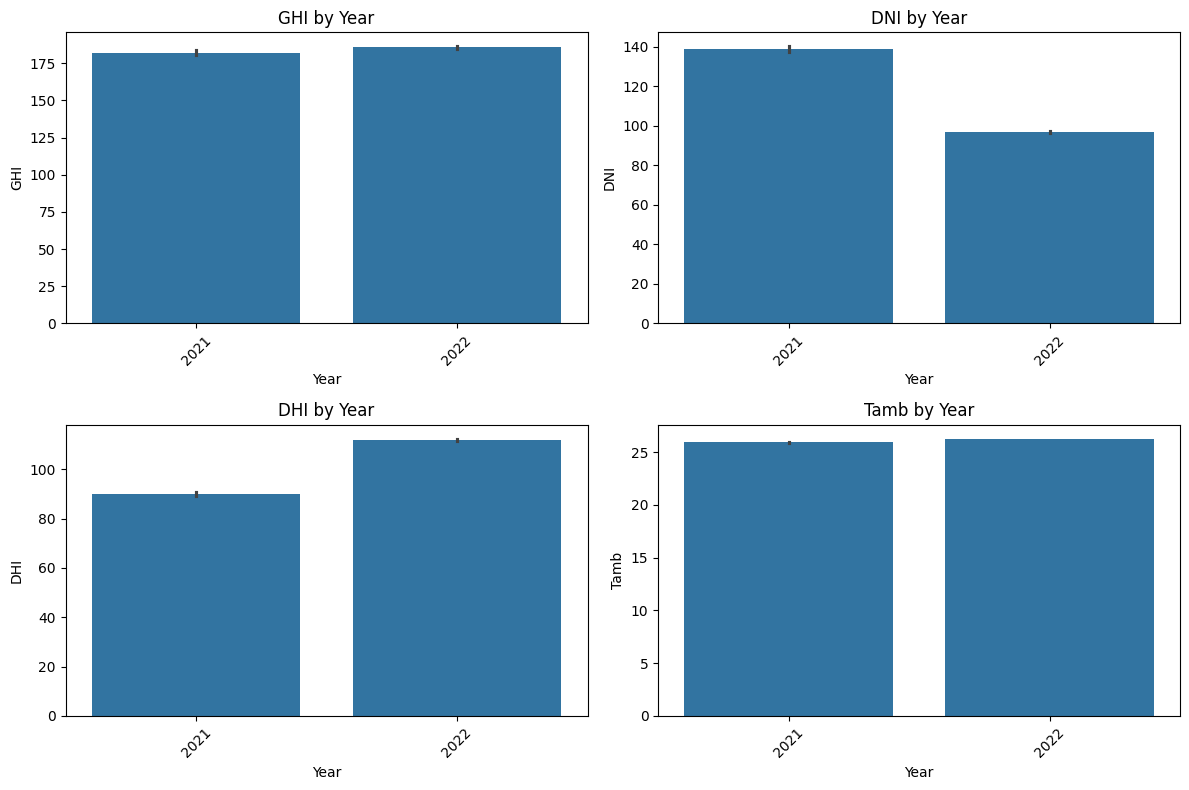

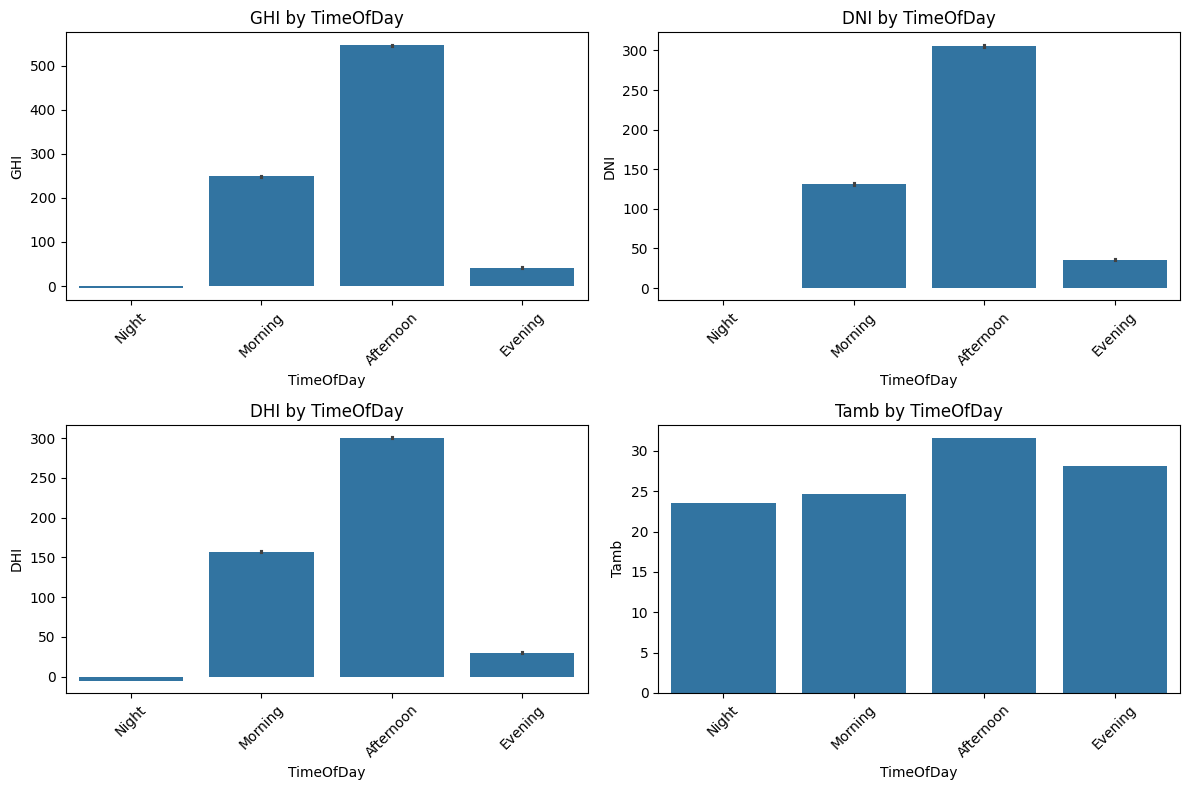

In [7]:
# Visualizations
lineplot_timeseries(df_clean, ["GHI","DNI","DHI","Tamb"])
barplot_by_time(df_clean, ["GHI","DNI","DHI","Tamb"], "DayOfWeek",
                order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
barplot_by_time(df_clean, ["GHI","DNI","DHI","Tamb"], "Month",
                order=["January","February","March","April","May","June",
                       "July","August","September","October","November","December"])
barplot_by_time(df_clean, ["GHI","DNI","DHI","Tamb"], "Year")
barplot_by_time(df_clean, ["GHI","DNI","DHI","Tamb"], "TimeOfDay")

<Axes: title={'center': 'Average Module Reading Pre/Post Cleaning'}, xlabel='Cleaning'>

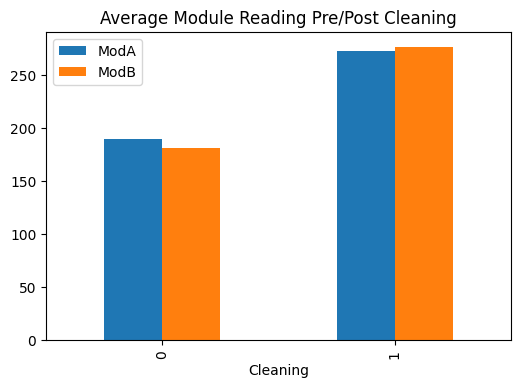

In [8]:
# Cleaning impact
impact = cleaning_impact(df_clean)
impact.plot(kind="bar", figsize=(6,4), title="Average Module Reading Pre/Post Cleaning")

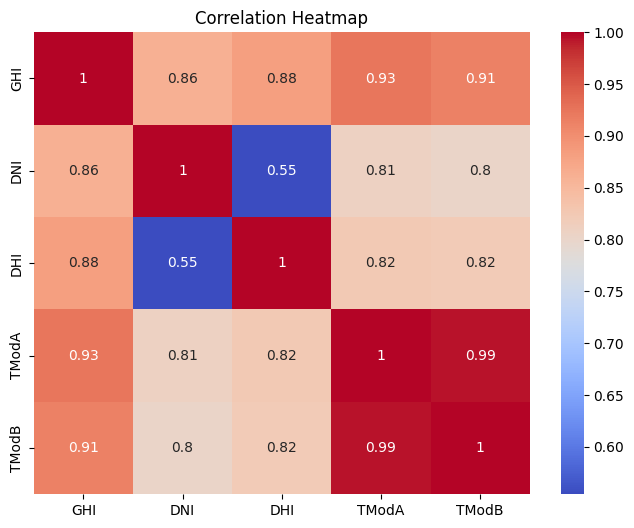

In [9]:
# Correlation
corr = correlation_heatmap(df_clean, ["GHI","DNI","DHI","TModA","TModB"])

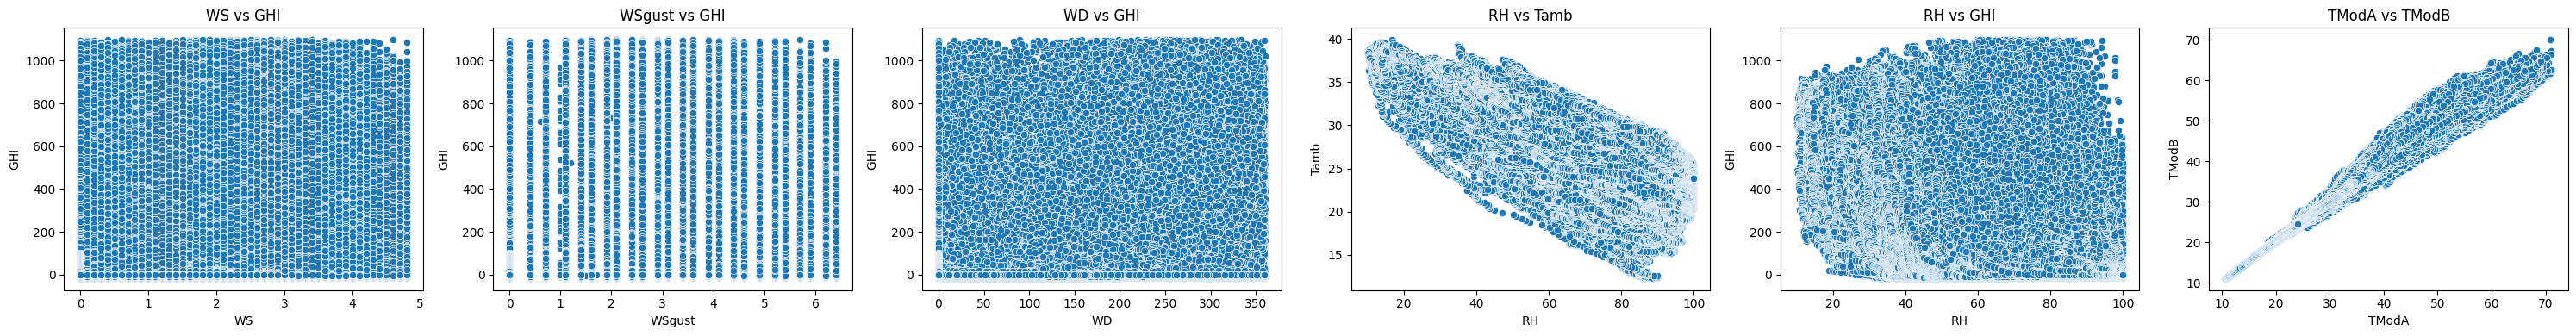

In [10]:
# Scatter plots
scatter_plots(df_clean, [("WS","GHI"), ("WSgust","GHI"), ("WD","GHI"), ("RH","Tamb"), ("RH","GHI"), ("TModA","TModB")])

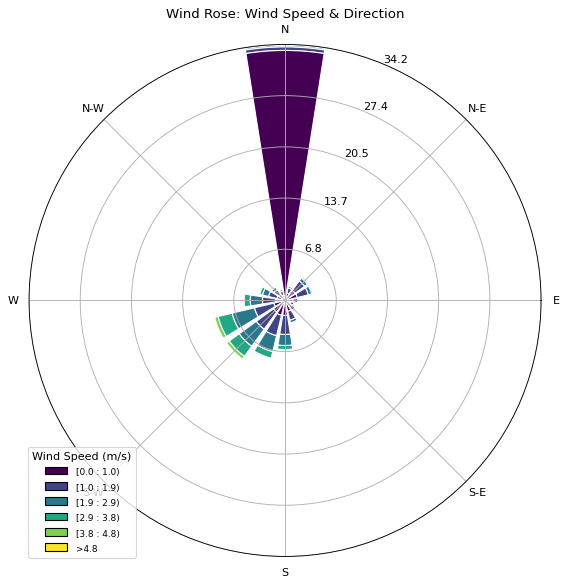

In [11]:
# Wind rose
wind_rose(df_clean)

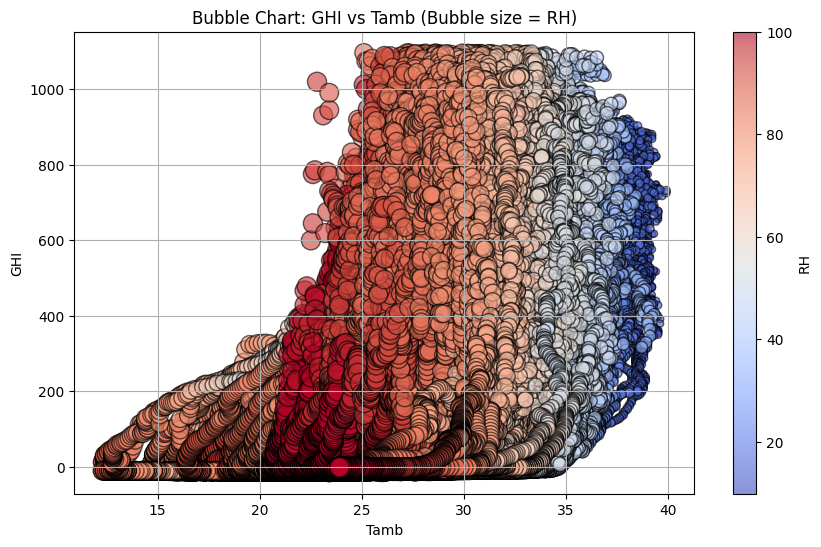

In [12]:
# Bubble chart
bubble_chart(df_clean, "Tamb", "GHI", size_col="RH", color_col="RH")

In [13]:
# Save cleaned data
df_clean.to_csv("../data/processed/sierraleone_clean.csv", index=False)